In [2]:
import numpy as np
import matplotlib.pyplot as plt

# high quality plots
plt.rcParams['figure.dpi'] = 300

#### **Auto-associative networks and pattern completion**

#### 1. Creating the Hebbian Matrix

Implement a network with 10 neurons in an input and output layer, using input vectors distributed and normalized as in the lab for Week 3. Create an outer product matrix to realize two "auto-associations" - that is, when presented with an activity pattern on the input layer, the network should re-generate the same pattern in the output layer.

First, let's create a function to generate the Hebbian system and another function to recall the output pattern from the Hebbian system — these functions will be used throughout the assignment. 

In [6]:
# function to create a Hebbian system of some size
def createHebbianSystem(N, M, eta = 1): 
    """
    Generate a Hebbian system with M associations, where each association
    consists of an N-dimensional input pattern and an N-dimensional output pattern.
    
    Parameters:
      N (int): Number of neurons (dimension of each vector)
      M (int): Number of associations (patterns)
      eta (float): Learning rate
      
    Returns:
      x (ndarray): Input patterns, shape (N, M)
      y (ndarray): Output patterns, shape (N, M)
      A (ndarray): Aggregate Hebbian matrix, shape (N, N), computed as
                   A = sum_{i=0}^{M-1} eta * outer( y[:, i], x[:, i] )
    """

    # initialize input and output vectors
    x = np.zeros( (N,M) )
    y = np.zeros( (N,M) )

    for ii in range(M):
        # Generate random pattern in [-1, 1] and normalize
        x[:,ii] = 2 * ( np.random.rand( N ) - 0.5 )
        x[:,ii] = x[:,ii] / np.linalg.norm( x[:,ii] )
        y[:,ii] = 2 * ( np.random.rand( N ) - 0.5 )
        y[:,ii] = y[:,ii] / np.linalg.norm( y[:,ii] )
    
    # generate the aggregate Hebbian outer product matrix
    A = np.zeros((N, N))
    for ii in range(M):
        A += eta * np.outer(y[:, ii], x[:, ii])

    return x, y, A

# function to recall the output pattern from a given Hebbian system
def recallPattern(A, x_input, degradation_degree = 0, num_patterns_to_degrade = 1): 
    """
    Recall the output pattern from the Hebbian system.

    Parameters:
        A (ndarray): Hebbian matrix, shape (N, N)
        x_input (ndarray): Input pattern(s) matrix, shape (N, M)
        degradation (int): Number of random zero-values to set in the input pattern
    
    Returns:
        y_prime (ndarray): Output pattern(s) matrix, shape (N, M)
    """

    M = len(x_input[0,:])
    N = len(x_input[:,0])

    # error handling (cant degrade more than the number of neurons or patterns in the input matrix)
    if degradation_degree > N or num_patterns_to_degrade > M: 
        raise ValueError("Degradation degree or number of patterns to degrade is greater than the number of neurons or patterns in the input matrix")

    x = np.copy(x_input)

    # degrade the input pattern if degradation is non-zero
    if degradation_degree > 0: 

        for ii in range(num_patterns_to_degrade): 
            # Get random indices to set to zero
            indices = np.random.choice(len(x_input[:,ii]), size=degradation_degree, replace=False)
            print(indices)
            x[indices,ii] = 0

    # compute the output pattern y' for each of the M associations
    y_prime = np.zeros( (N,M) )
    for ii in range(M): 
        y_prime[:,ii] = A @ x[:, ii]

    return y_prime



In [40]:
# test the functions without degradation

N = 10
M = 2
eta = 1

# create a Hebbian system
x, y, A = createHebbianSystem(N, M, eta)

# recall the output pattern
y_prime = recallPattern(A, x)

# compute the error by computing the dot product 
for ii in range(M): 
    # print(np.dot(y[:,ii], y_prime[:,ii]))
    print(np.abs( y[:,ii].T @ y_prime[:,ii] ))

1.0542779505991298
1.0542779505991295


In [ ]:
# we can create thousands of these systems and compute the mean error between the associations 
# and report the mean error to assess the performance of the Hebbian system

# create a large number of Hebbian systems
num_systems = 1000
errors = np.zeros(num_systems)

for ii in range(num_systems): 
    x, y, A = createHebbianSystem(N, M, eta)
    y_prime = recallPattern(A, x)
    errors[ii] = np.mean(np.abs( y[:,ii].T @ y_prime[:,ii] ))

# compute the mean error
mean_error = np.mean(errors)
print(mean_error)

IndexError: index 100 is out of bounds for axis 1 with size 100

As is evident from the above code, the Hebbian system is able to recall the output pattern with a high degree of accuracy. Now we can move on and test pattern completion in the Hebbian system.

#### **2. Testing pattern completion by passing degraded inputs**

Next, investigate pattern completion in this network. Take one of the stored patterns and create a degraded version by setting one or two elements of the input vector to zero. Attempt to retrieve the original patterns using these degraded inputs. Quantify how well the network reconstructs the original patterns. What changes when two elements are set to zero instead of one?

##### **2.1 Degrading 1 element (of one input pattern)**

[8]


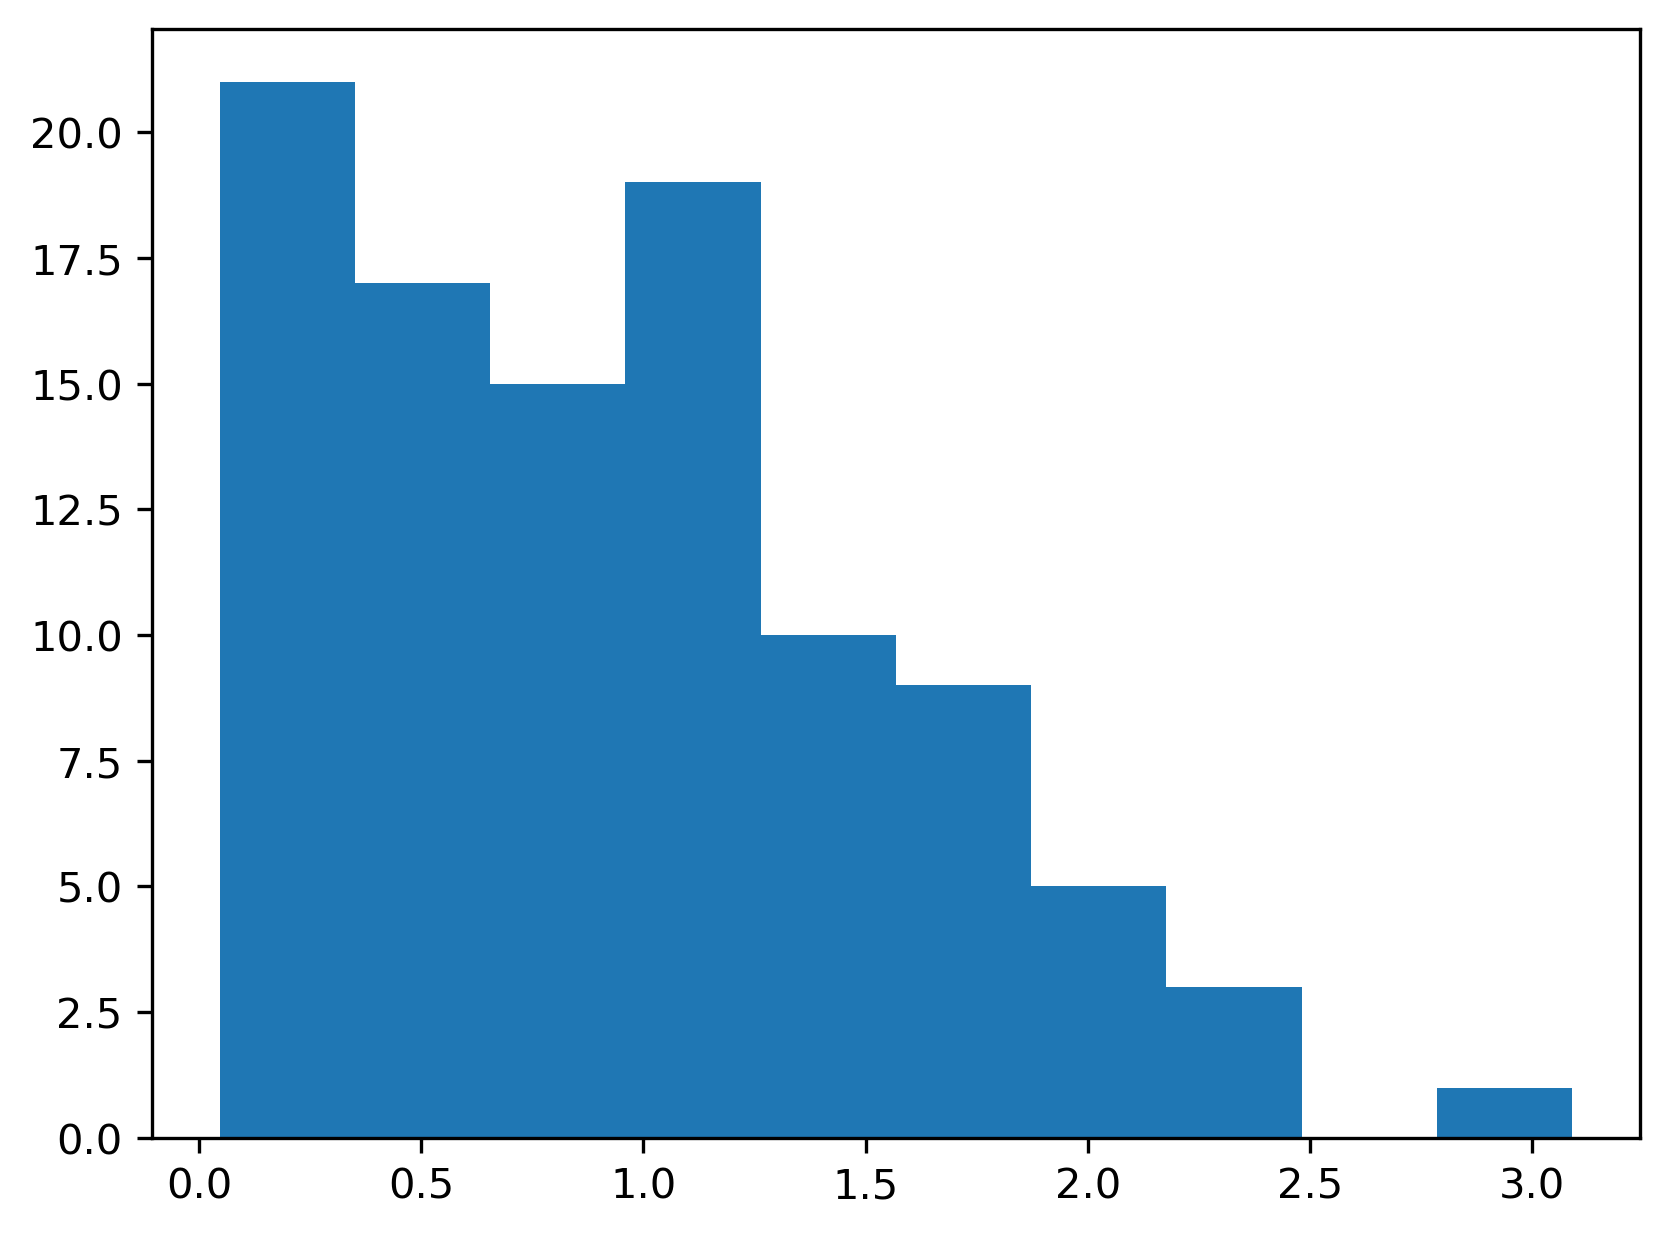

In [ ]:
# create the system 
N = 10; M = 100; eta = 1
x, y, A = createHebbianSystem(N, M, eta)

# recall the output pattern with degradation of the input
y_prime = recallPattern(A, x, degradation_degree=1, num_patterns_to_degrade=1)

# initialize the error vector 
error = np.zeros(M)

# compute the error for each of the M associations
for ii in range(M): 
    error[ii] = np.abs( y[:,ii].T @ y_prime[:,ii] )

# show the error in a histogram
plt.hist(error)
plt.show()

##### **2.2 Degrading 2 elements (of one input pattern)**

[2 6]


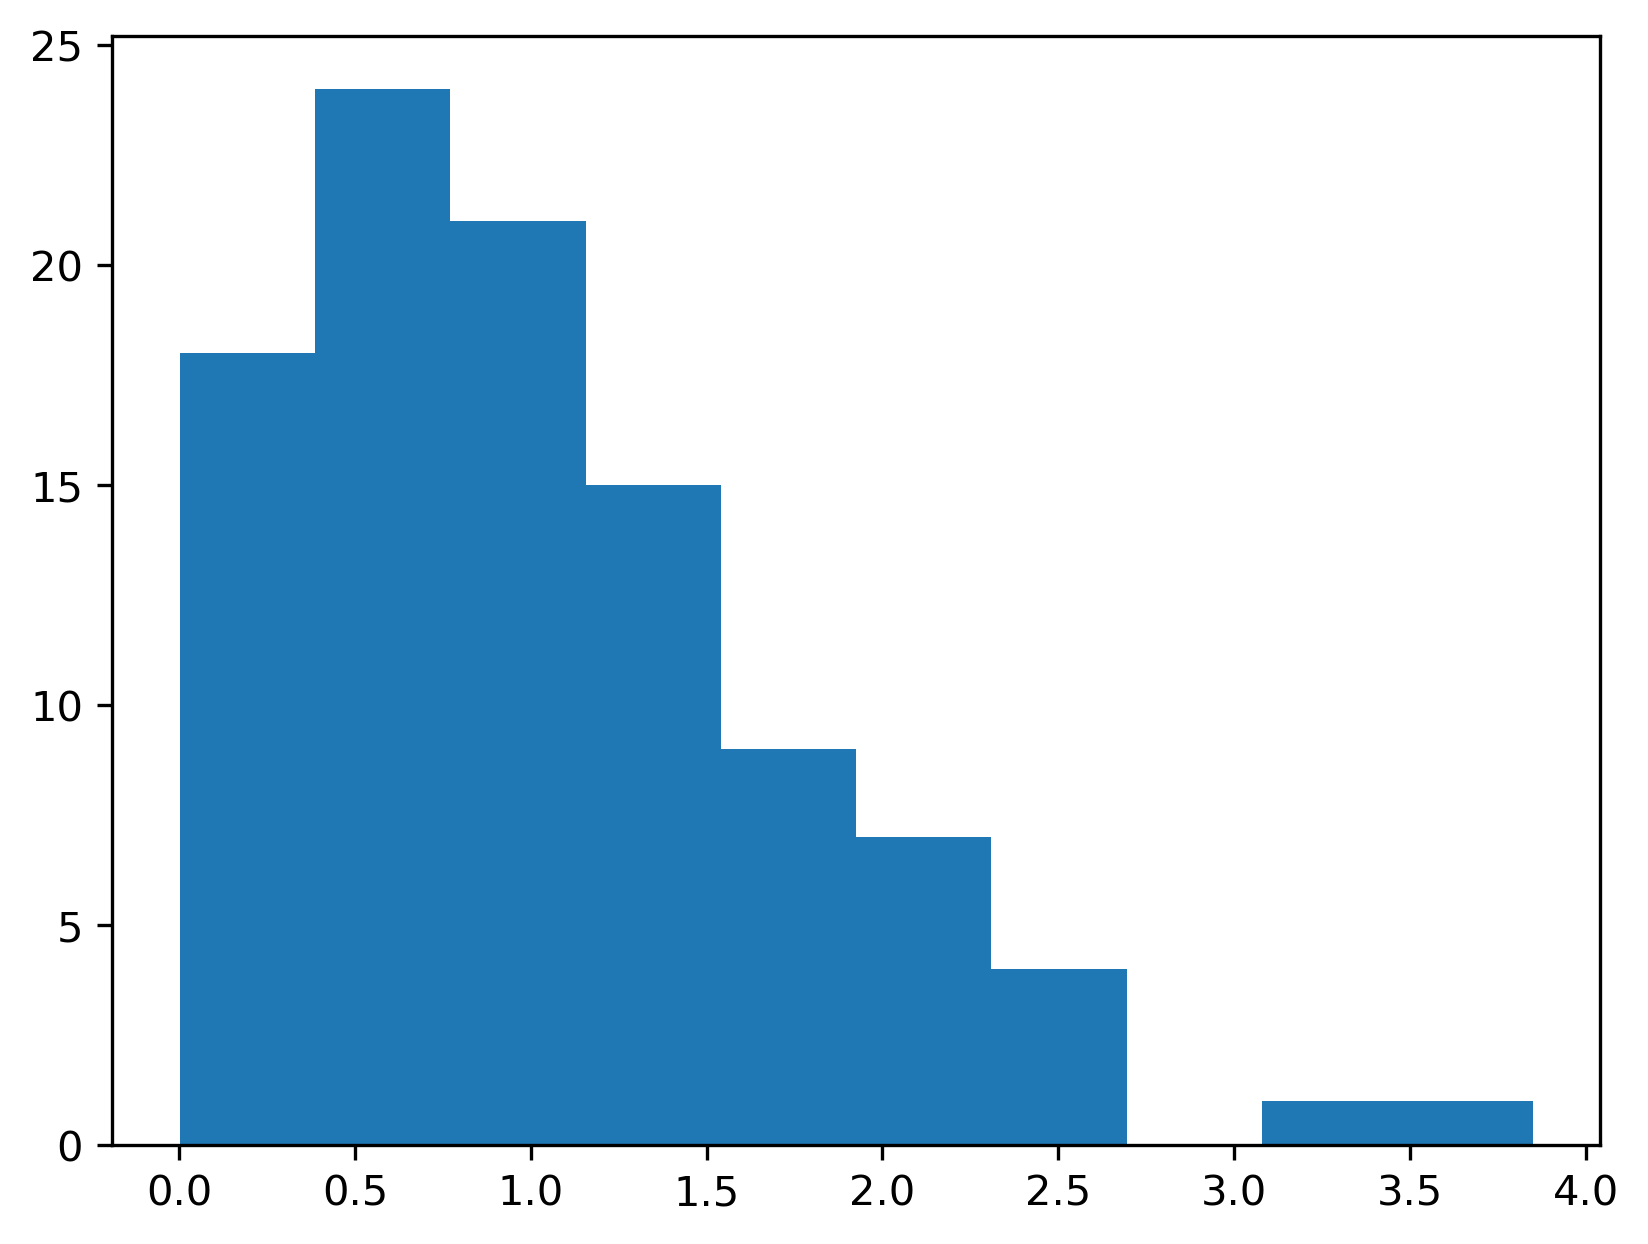

In [36]:
# create the system 
N = 10; M = 100; eta = 1
x, y, A = createHebbianSystem(N, M, eta)

# recall the output pattern with degradation of the input
y_prime = recallPattern(A, x, degradation_degree=2, num_patterns_to_degrade=1)

# initialize the error vector 
error = np.zeros(M)

# compute the error for each of the M associations
for ii in range(M): 
    error[ii] = np.abs( y[:,ii].T @ y_prime[:,ii] )

# show the error in a histogram
plt.hist(error)
plt.show()